<a href="https://colab.research.google.com/github/collinsmarra/prediction-sstuff/blob/main/height.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

In [3]:
class GenerateData:
    def height(self):
        high = 220
        low = 140
        df = pd.DataFrame(np.random.randint(low, high,size=(1000 , 1)), columns=["height" ])
        df.to_csv("height.csv", index=False)
        return True
    def age(self):
        high = 23
        low = 15
        df = pd.DataFrame(np.random.randint(low, high, size=(1000 , 1)), columns=["Age"])
        df.to_csv("age.csv", index=False)
        return True
    def gender(self):
        gender =[1, 0]
        df = pd.DataFrame(np.random.choice(gender, size=1000),columns=['Gender'])
        df.to_csv("gender.csv", index=False)
        return True
    def foods(self):
        food_list ={"Maize":1, "Meat":2, "Fish":3, "Potatoes":4, "Rice":5}
        df = pd.DataFrame(np.random.choice(list(food_list.values()), size=1000),columns=['Food'])
        df.to_csv("foods.csv", index=False)
        return True
    def geolocation(self):
        geo_list =[1, 0]
        df = pd.DataFrame(np.random.choice(geo_list, size=1000),columns=['Geolocation'])
        df.to_csv("geolocation.csv", index=False)
        return True
    
    def origin(name: str):
        origins = {"Nilotes":2, "Bantus":3, "Cushites":3}
        df = pd.DataFrame(np.random.choice(list(origins.values()), size=1000),columns=['Origin'])
        df.to_csv("origins.csv", index=False)
        return True

In [4]:
ghd = GenerateData()
ghd.height()
ghd.foods()
ghd.age()
ghd.origin()
ghd.geolocation()
ghd.gender()

True

In [ ]:
age = pd.read_csv("age.csv")
foods = pd.read_csv("foods.csv")
gender = pd.read_csv("gender.csv")
geolocs = pd.read_csv("geolocation.csv")
height = pd.read_csv("height.csv")
origins = pd.read_csv("origins.csv")

#df = pd.DataFrame(a)
dfage = pd.DataFrame(age)
dfgender = pd.DataFrame(gender)
dfgeolocs = pd.DataFrame(geolocs)
dforigins = pd.DataFrame(origins)
dffoods = pd.DataFrame(foods)
dfheight = pd.DataFrame(height)

concat = pd.concat([dfage, dfgender,dforigins, dfgeolocs,dffoods, dfheight], axis=1).reindex(dfage.index)
concat.to_csv("train.csv", index=False)
print(True)


True


In [5]:
class GenerateTestData:
    def age(self):
        high = 23
        low = 15
        df = pd.DataFrame(np.random.randint(low, high, size=(100 , 1)), columns=["Age"])
        df.to_csv("age.csv", index=False)
        return True
    def gender(self):
        gender =[1, 0]
        df = pd.DataFrame(np.random.choice(gender, size=100),columns=['Gender'])
        df.to_csv("gender.csv", index=False)
        return True
    def foods(self):
        food_list ={"Maize":1, "Meat":2, "Fish":3, "Potatoes":4, "Rice":5}
        df = pd.DataFrame(np.random.choice(list(food_list.values()), size=100),columns=['Food'])
        df.to_csv("foods.csv", index=False)
        return True
    def geolocation(self):
        geo_list =[1, 0]
        df = pd.DataFrame(np.random.choice(geo_list, size=100),columns=['Geolocation'])
        df.to_csv("geolocation.csv", index=False)
        return True
    
    def origin(name: str):
        origins = {"Nilotes":2, "Bantus":3, "Cushites":3}
        df = pd.DataFrame(np.random.choice(list(origins.values()), size=100),columns=['Origin'])
        df.to_csv("origins.csv", index=False)
        return True

In [6]:
ghd = GenerateTestData()
ghd.foods()
ghd.age()
ghd.origin()
ghd.geolocation()
ghd.gender()

True

In [7]:
age = pd.read_csv("age.csv")
foods = pd.read_csv("foods.csv")
gender = pd.read_csv("gender.csv")
geolocs = pd.read_csv("geolocation.csv")
origins = pd.read_csv("origins.csv")

#df = pd.DataFrame(a)
dfage = pd.DataFrame(age)
dfgender = pd.DataFrame(gender)
dfgeolocs = pd.DataFrame(geolocs)
dforigins = pd.DataFrame(origins)
dffoods = pd.DataFrame(foods)

concat = pd.concat([dfage, dfgender,dforigins, dfgeolocs, dffoods], axis=1).reindex(dfage.index)
concat.to_csv("test.csv", index=False)
print(True)

True


In [8]:
dd = pd.read_csv("train.csv")
print(dd.head())
print(dd.describe())
dd.plot()
plt.show()

ddt = pd.read_csv("test.csv")
print(ddt.head())
print(ddt.describe())
ddt.plot()
plt.show()

FileNotFoundError: ignored

In [ ]:
class Trainer:
	def __init__(self, train, test, output):
		self.train = train
		self.test = test
		self.output = output

	def trainer(self):
		data = pd.read_csv(self.train)
		array = data.values

		df = pd.DataFrame(array)
		maindf = df[[0,1,2,3,4]]
		mainarray = maindf.values
		tempdf = df[5]

		train_y = tempdf.values
		for i in range(len(train_y)):
			train_y[i] = str(train_y[i])
		self.learn = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter=1000)
		self.learn.fit(mainarray, train_y)
		print(self.learn.fit(mainarray, train_y))
		print("Train \n \t200 OK")

	def tester(self):
		testdata = pd.read_csv(self.test)
		tester_array = testdata.values

		dft = pd.DataFrame(tester_array)
		testdf = dft[[0,1,2,3,4]]
		maintestarray = testdf.values
		self.x_predict = self.learn.predict(maintestarray)
		for i in range(len(self.x_predict)):
			self.x_predict[i] = str(self.x_predict[i])
		print("Test \n \t200 OK")

	def back_to_df(self):
		self.bdf = pd.DataFrame(self.x_predict, columns=['Predicted Height'])
		self.bdf.index = self.bdf.index
		self.bdf.to_csv(self.output, index=False)

	def combine_data(self):
		main = pd.read_csv(self.test)
		dataframe = pd.DataFrame(main)
		dataframe2 = self.bdf
		concat = pd.concat([dataframe,dataframe2], axis=1).reindex(dataframe.index)
		concat.to_csv(self.output, index=False)
		print(" \033[92m Done successfully")

In [9]:
data = "train.csv"
test = "test.csv"
output = "out.csv"
train = Trainer(data, test, output)
train.trainer()
train.tester()
train.back_to_df()
train.combine_data()



NameError: ignored

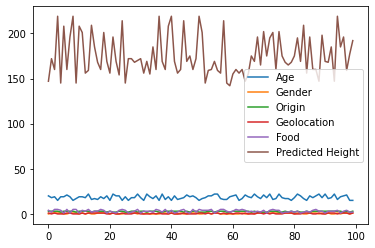

In [ ]:
pdf = pd.read_csv("/content/out.csv")
pdf.plot()
plt.show()